#Testing on gradio

In [ ]:
!pip install fastapi uvicorn transformers newspaper3k gradio lxml_html_clean


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 78.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import pipeline
import newspaper

# Load translation and summarization models
translator = pipeline("translation_ar_to_en", model="Helsinki-NLP/opus-mt-ar-en")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def process_article(url):
    try:
        # Extract the article text from the URL
        article = newspaper.Article(url)
        article.download()
        article.parse()
        arabic_text = article.text

        if not arabic_text:
            return "Failed to extract text from the provided URL.", "Failed to extract text from the provided URL."

        # Translate the Arabic text to English
        translation = translator(arabic_text)
        if not translation or not translation[0] or 'translation_text' not in translation[0]:
            return "Failed to translate the text.", "Failed to translate the text."
        translated_text = translation[0]['translation_text']

        # Summarize the translated text
        summary = summarizer(translated_text)
        if not summary or not summary[0] or 'summary_text' not in summary[0]:
            return "Failed to summarize the text.", "Failed to summarize the text."
        summarized_text = summary[0]['summary_text']

        return translated_text, summarized_text
    except Exception as e:
        return str(e), str(e)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/917k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=process_article,
    inputs=gr.Textbox(lines=2, placeholder="Enter the URL of the Arabic news article"),
    outputs=[gr.Textbox(label="Translated Text"), gr.Textbox(label="Summarized Text")],
    title="Arabic News Translator and Summarizer",
    description="Enter the URL of an Arabic news article to translate it to English and get a summary."
)

interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://91bcd4e1bc7993948f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Testing on Flask app

In [ ]:
!pip install -q newspaper3k
!pip install -q lxml_html_clean
import newspaper

In [ ]:
from transformers import pipeline

In [ ]:
!pip install Flask pyngrok
!pip install -q pyspark==3.3.0 spark-nlp==4.2.8
!pip install --upgrade -q spark-nlp-display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.4 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import numpy as np
from flask import Flask, request, render_template_string
from transformers import pipeline as transformers_pipeline
from newspaper import Article

import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import SentenceDetectorDLModel, MarianTransformer
from sparknlp.base import LightPipeline

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

In [ ]:
# Initialize Spark NLP
spark = sparknlp.start()

# Initialize the summarizer pipeline
summarizer = transformers_pipeline("summarization", model="facebook/bart-large-cnn")

# Function to initialize the translation pipeline
def get_pipeline():
    documentAssembler = DocumentAssembler().setInputCol("text").setOutputCol("document")
    sentencerDL = SentenceDetectorDLModel().pretrained("sentence_detector_dl", "xx").setInputCols(["document"]).setOutputCol("sentences")
    marian = MarianTransformer.pretrained("opus_mt_ar_en", "xx").setInputCols(["sentences"]).setOutputCol("translation")

    nlp_pipeline = Pipeline(stages=[documentAssembler, sentencerDL, marian])
    empty_df = spark.createDataFrame([[""]]).toDF('text')
    pipeline_model = nlp_pipeline.fit(empty_df)
    lmodel = LightPipeline(pipeline_model)
    return lmodel

# Load the translation pipeline
pipeline = get_pipeline()

# Function to extract text from a URL using newspaper3k
def extract_text_from_url(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

# Function to summarize text
def summarize_text(text):
    summary = summarizer(text)
    if not summary or not summary[0] or 'summary_text' not in summary[0]:
        return "Failed to summarize the text."
    return summary[0]['summary_text']


Token indices sequence length is longer than the specified maximum sequence length for this model (1327 > 512). Running this sequence through the model will result in indexing errors
Your input_length: 1327 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
opus_mt_ar_en download started this may take some time.
Approximate size to download 390.7 MB
[OK!]


In [ ]:
# Starting Flask app
app = Flask(__name__)

# HTML template as a string
template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Machine Translation</title>
        <style>
        body {
            background-color: #f3e5f5;
            color: #4a148c;
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 0;
            padding: 0;
        }

        h1 {
            font-size: 2.5em;
            margin: 20px 0;
            color: #4a148c;
        }

        p {
            font-size: 1.2em;
            margin: 10px 0;
            color: #6a1b9a;
            text-align: center;
        }

        form {
            display: inline-block;
            margin-top: 20px;
        }

        label {
            font-size: 1.2em;
        }

        textarea {
            width: 50%;
            height: 100px;
            border: 2px solid #4a148c;
            border-radius: 10px;
            padding: 10px;
            font-size: 1em;
            margin-top: 10px;
            margin-bottom: 20px;
        }

        input[type="submit"] {
            background-color: #7b1fa2;
            color: white;
            padding: 10px 20px;
            border: none;
            border-radius: 20px;
            font-size: 1.2em;
            cursor: pointer;
        }

        input[type="submit"]:hover {
            background-color: #6a1b9a;
        }

        h2 {
            font-size: 1.8em;
            margin: 20px 0 10px;
            color: #4a148c;
        }

        textarea, p, input[type="submit"], h2 {
            text-align: left;
            display: block;
            margin-left: auto;
            margin-right: auto;
        }
    </style>
</head>
<body>
    <h1>Machine Translation</h1>
    <form method="POST" action="/translate">
        <label for="text">Text to translate:</label><br>
        <textarea id="text" name="text" rows="4" cols="50"></textarea><br><br>

        <input type="submit" value="Translate">
    </form>
    <h1>URL Translation and Summarization</h1>
    <form method="POST" action="/translate_url">
        <label for="url">URL to translate and summarize:</label><br>
        <input type="text" id="url" name="url" size="50"><br><br>

        <input type="submit" value="Translate and Summarize">
    </form>
    {% if original_text %}
        <h2>Original Text:</h2>
        <p>{{ original_text }}</p>
        <h2>Translated Text:</h2>
        <p>{{ translated_text }}</p>
    {% endif %}
    {% if summarized_text %}
        <h2>Summarized Text:</h2>
        <p>{{ summarized_text }}</p>
    {% endif %}
</body>
</html>
"""

@app.route('/')
def index():
    return render_template_string(template)

@app.route('/translate', methods=['POST'])
def translate():
    text = request.form['text']
    res = pipeline.fullAnnotate(text)
    translated_text = " ".join([sentence.result for sentence in res[0]['translation']])
    return render_template_string(template, original_text=text, translated_text=translated_text)

@app.route('/translate_url', methods=['POST'])
def translate_url():
    url = request.form['url']
    original_text = extract_text_from_url(url)
    res = pipeline.fullAnnotate(original_text)
    translated_text = " ".join([sentence.result for sentence in res[0]['translation']])
    summarized_text = summarize_text(translated_text)
    return render_template_string(template, original_text=original_text, translated_text=translated_text, summarized_text=summarized_text)

# Run Flask app
from pyngrok import ngrok

# Set ngrok authtoken
NGROK_AUTH_TOKEN = "2NpCES1cJyv7FsZtPHzY7EqbHlZ_25u5HZPeGmjdwu1CeFLZ1"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(5000)
print(f'Public URL: {public_url}')
app.run(port=5000)

Public URL: NgrokTunnel: "https://5a2a-34-125-144-85.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [08/Dec/2024 07:45:04] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Dec/2024 07:45:05] "GET /favicon.ico HTTP/1.1" 404 -


Before _validateStagesInputCols


INFO:werkzeug:127.0.0.1 - - [08/Dec/2024 07:50:39] "GET / HTTP/1.1" 200 -


Before _validateStagesInputCols


ERROR:__main__:Exception on /translate_url [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "<ipython-input-9-5c5483ec6041>", line 128, in translate_url
    summarized_text = summarize_text(translated_text)
  File "<ipython-input-8-f21ff5cc6bdf>", line 31, in summarize_text
    summary = summarizer(text)
  File "/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text2text_generation.py"

Before _validateStagesInputCols


INFO:werkzeug:127.0.0.1 - - [08/Dec/2024 08:10:18] "POST /translate_url HTTP/1.1" 200 -


Image of finalized UI: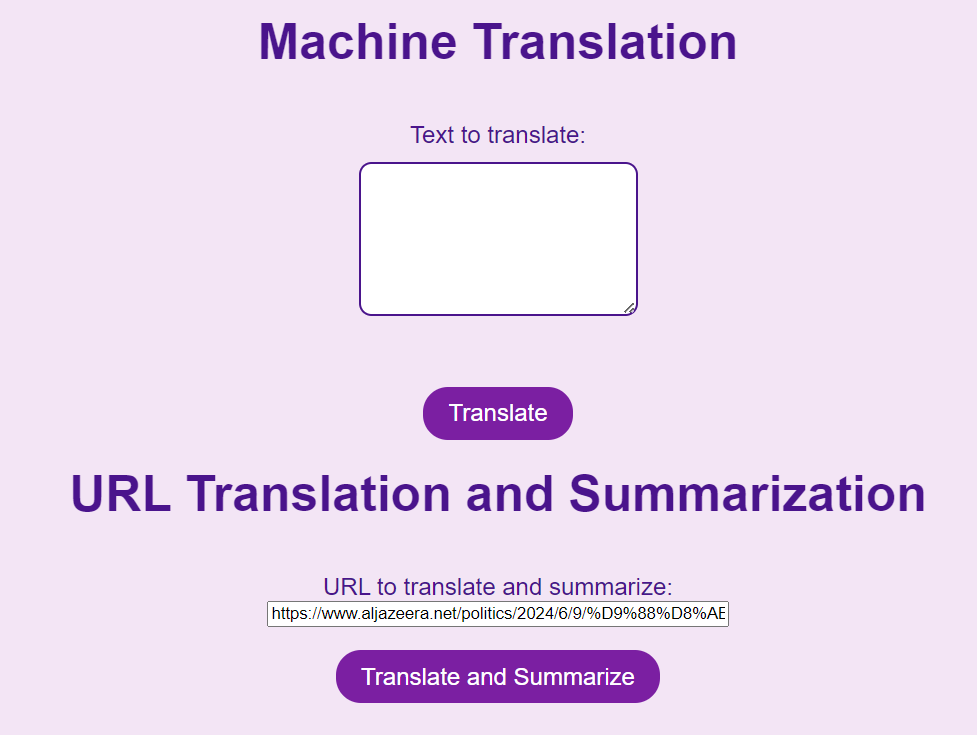

Image of demo UI with summarization results: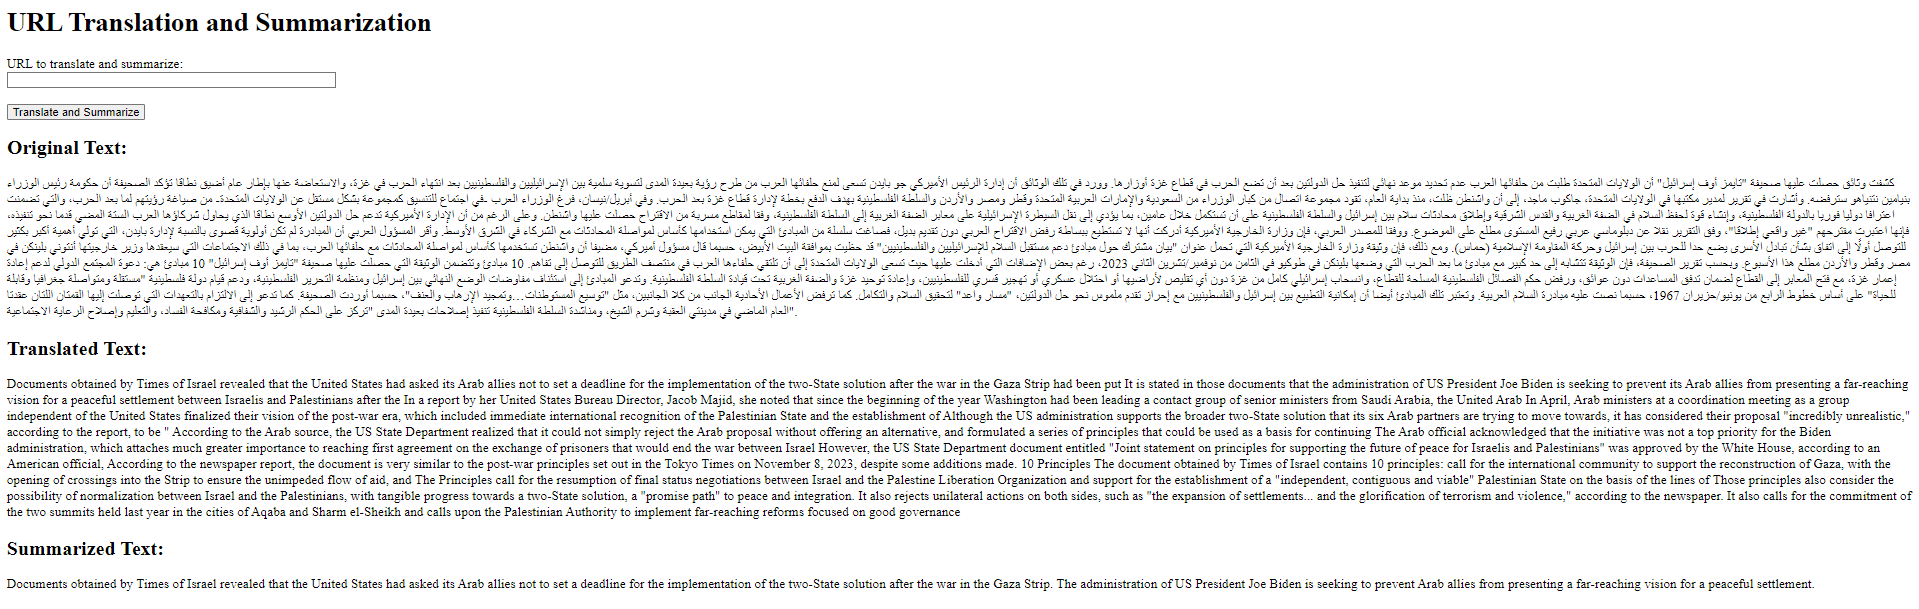

#for the second link from musketeers; first one gave an error

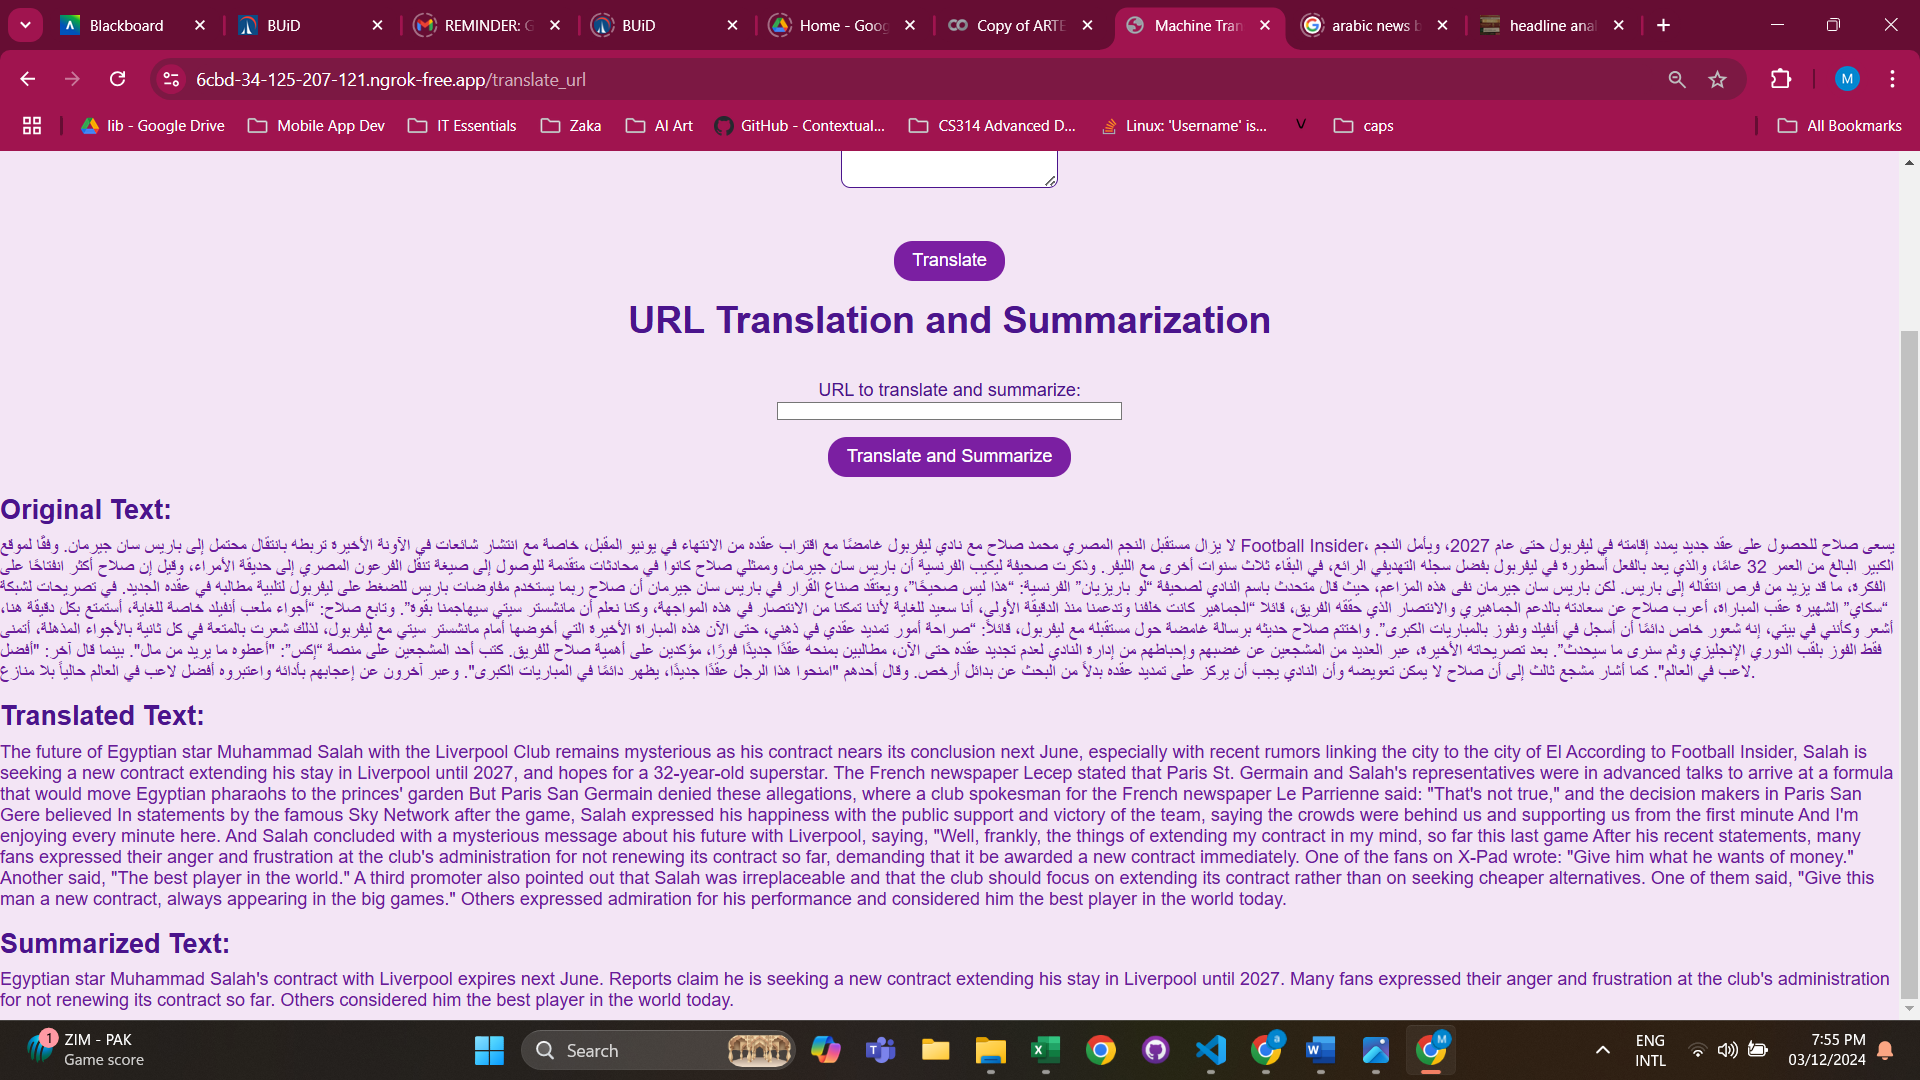

#third link

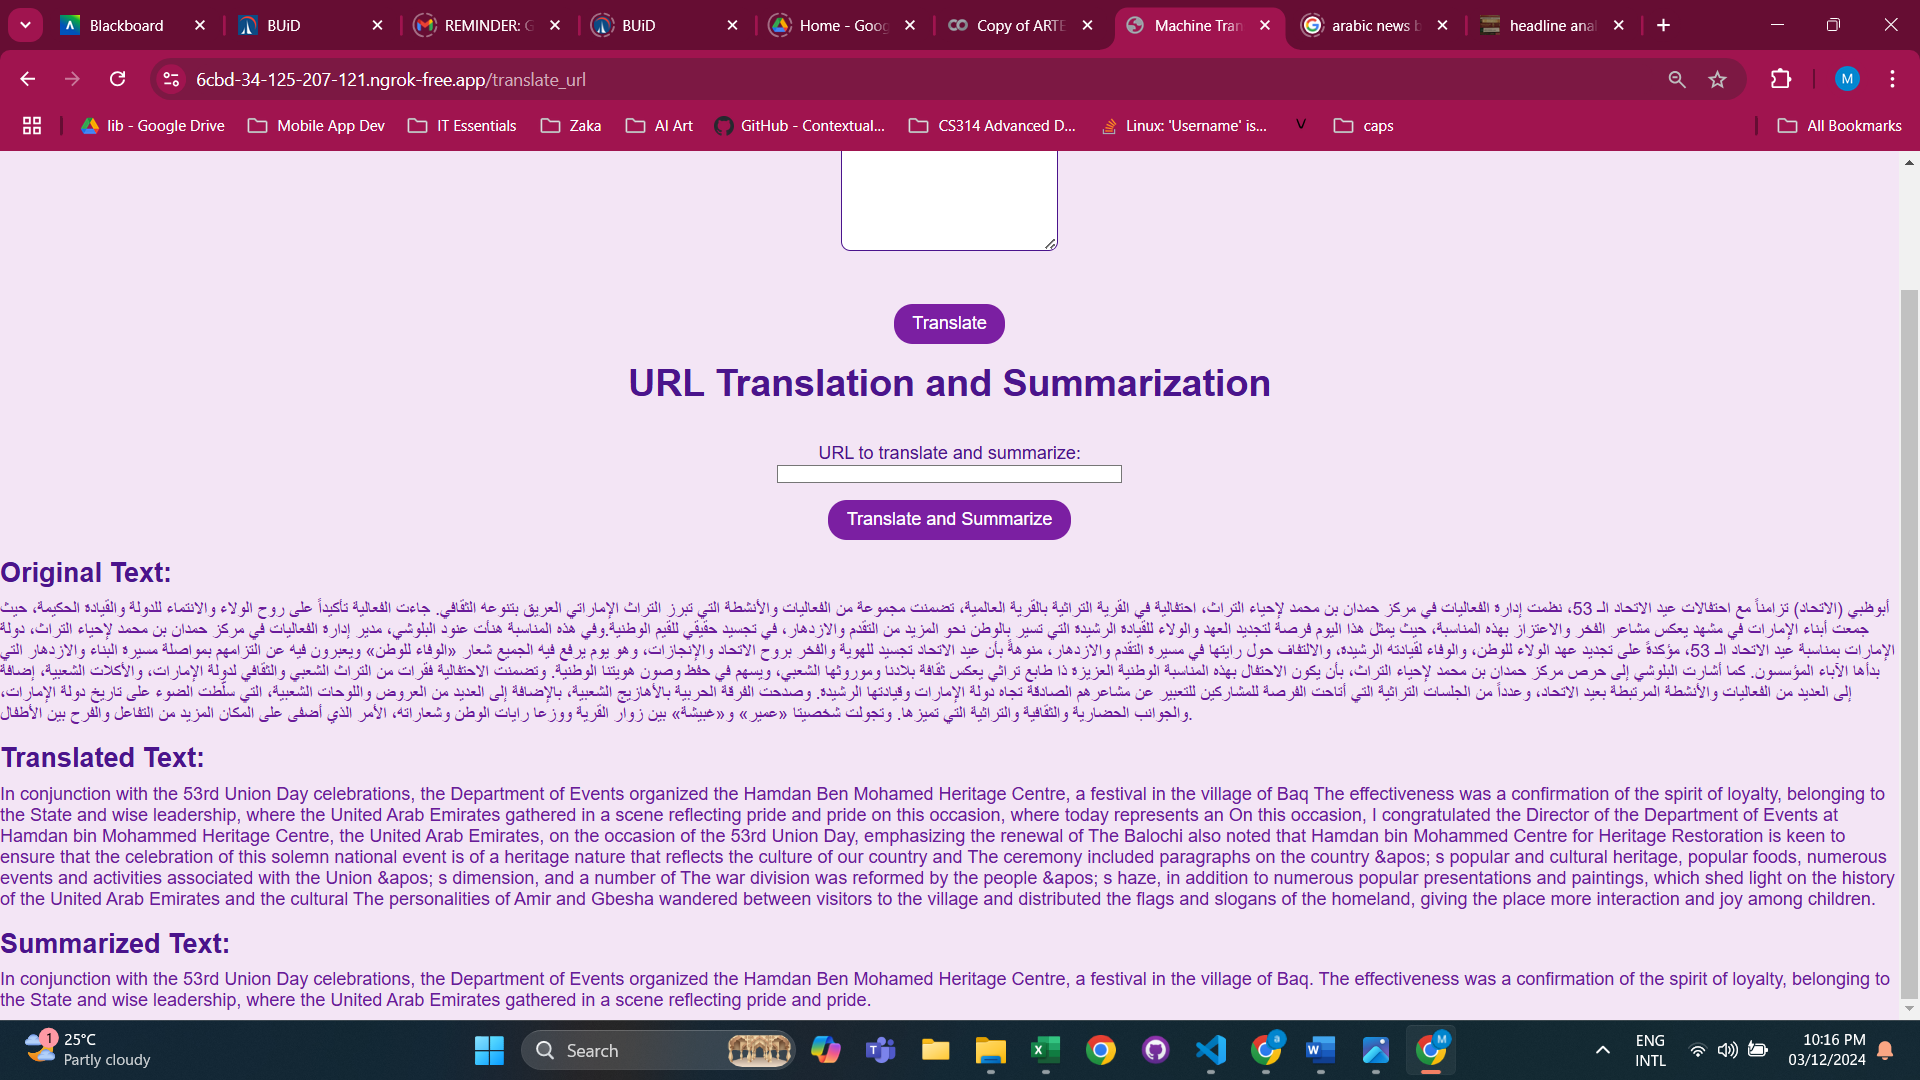

#For link 1 - economy

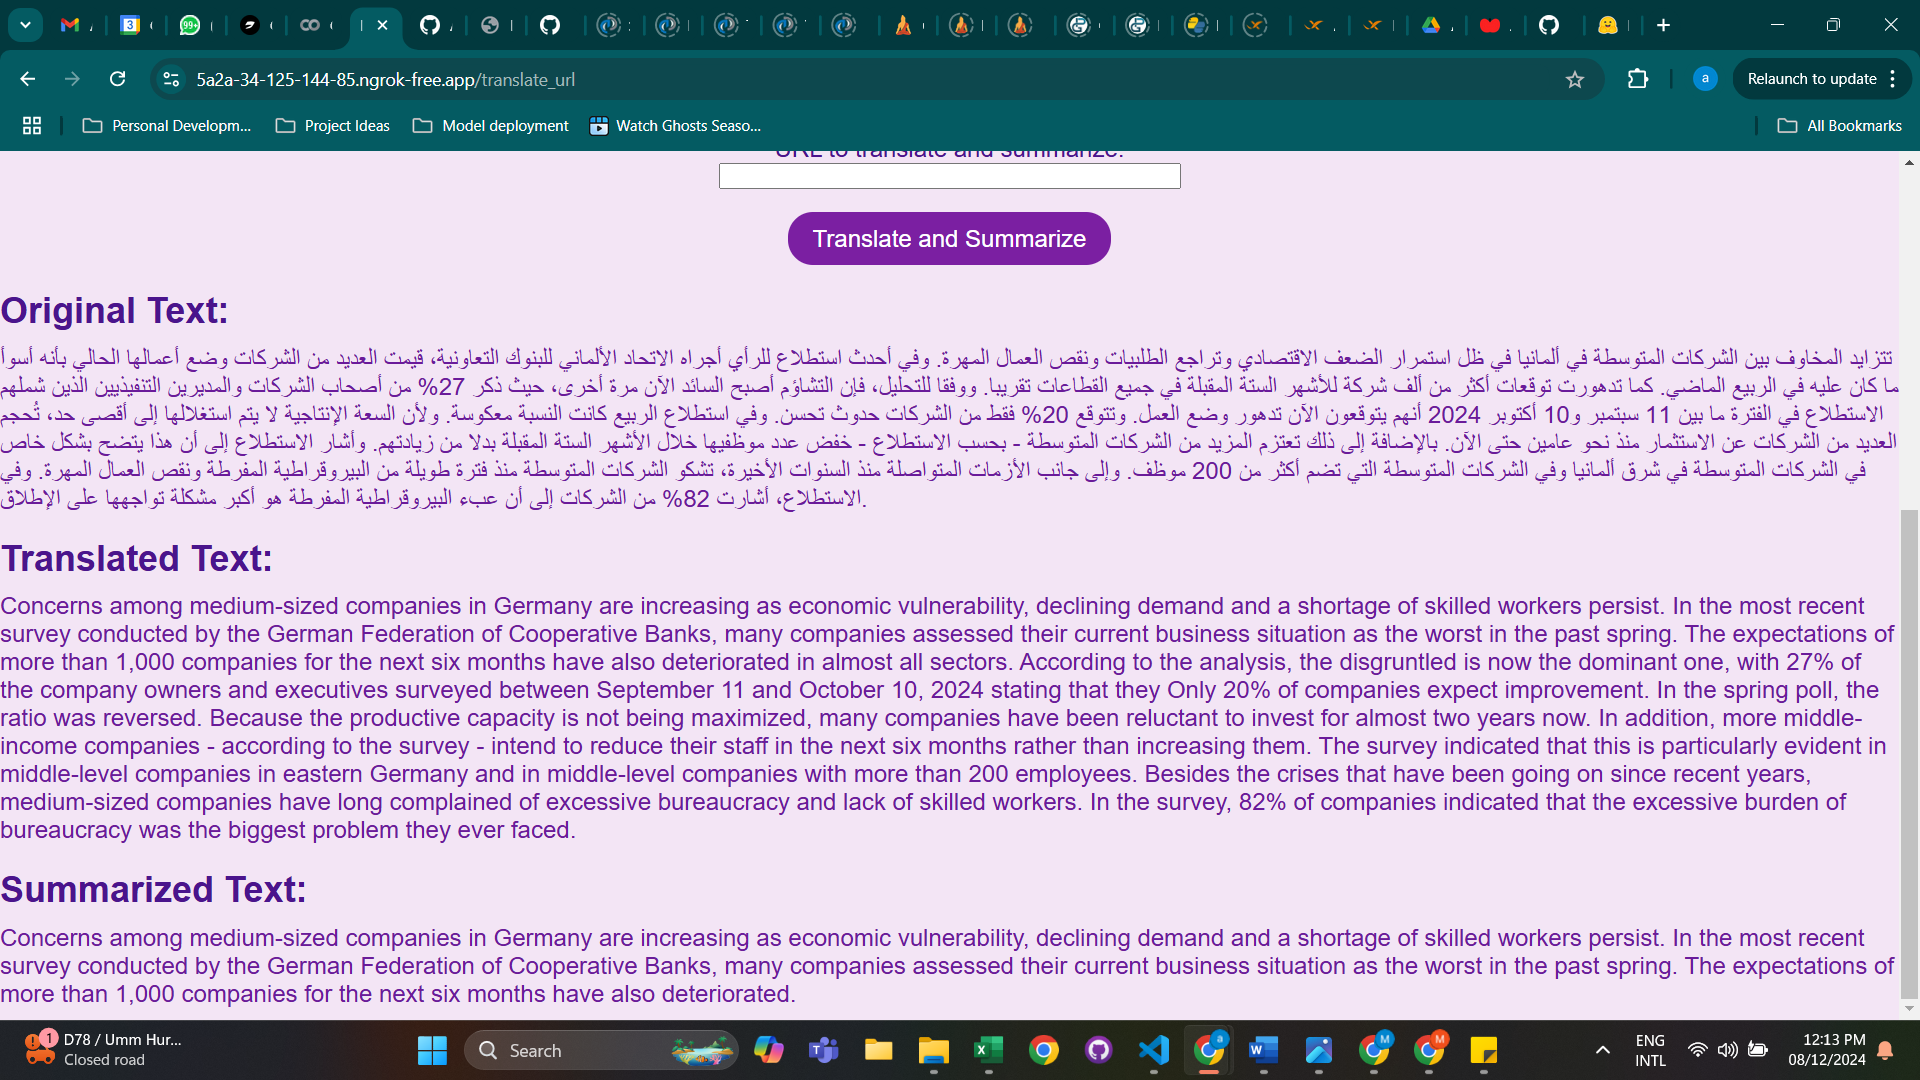